In [1]:
import pandas as pd
import numpy as np

import string
import math

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

import re

In [2]:
pd.options.display.max_colwidth = 200

In [3]:
df = pd.read_csv('anxiety_tweets.csv')

In [4]:
df.tail(20)

,text,user,date,retweet,mention,hashtags,location
9980,Good news... survived #RootCanal.... bad news .... I still suffer from #anxiety and passed out afterwards #FridayThoughts,Miguel1979,2019-11-22 16:35:13+00:00,0,NaN,#RootCanal #anxiety #FridayThoughts,NaN
9981,My anxiety is fucking with me at work I feel like shit,__wzrd__,2019-11-22 16:21:12+00:00,0,NaN,NaN,NaN
9982,love when my body is too physically exhausted to feel anxiety,dakotajamess,2019-11-22 16:11:03+00:00,0,NaN,NaN,NaN
9983,My anxiety is on 100 today,Mckennacm__,2019-11-22 15:16:00+00:00,0,NaN,NaN,NaN
9984,I’m on vacation for the next ten days and I’m actually having anxiety about the long to do list I made. I’m now also in the nesting phase of pregnancy so on the top of the list is cleaning the clo...,RovikaRajkishun,2019-11-22 14:48:05+00:00,0,NaN,NaN,NaN
9985,Jesus...I haven't been this nervous in ages....#Dentist #anxiety #stress #FridayMorning ....,Miguel1979,2019-11-22 14:29:40+00:00,0,NaN,#Dentist #anxiety #stress #FridayMorning,NaN
9986,This how you know the social anxiety is real. She said fuck it imma just clean nigguhs houses.,Stushkaiser,2019-11-22 12:38:10+00:00,0,NaN,NaN,NaN
9987,And this is coming from someone who is just naturally awkward and has had social anxiety since childhood. Plenty of people find me hilarious and I’m sure a good amount find me obnoxious and and un...,_HanSoto,2019-11-22 12:31:47+00:00,0,NaN,NaN,NaN
9988,"Y’all don’t know what social anxiety means, however this video weird as hell",NicksealeHQ,2019-11-22 12:25:01+00:00,0,NaN,NaN,NaN
9989,Omg if it wasn’t for @survivorcbs and @CBSBigBrother my entire commute from NYC - PHIL would be such a nightmare. Especially Survivor! Thank you for helping me survive through my anxiety during my...,Cami_Crew,2019-11-22 10:56:05+00:00,0,@survivorcbs @CBSBigBrother,NaN,NaN


In [5]:
stop_words = stopwords.words('english')

#add punctuation char's to stopwords list
stop_words += list(string.punctuation)
stop_words += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'anxiety','feel', 'give', 'giving', 'help', 'said', 'also', 'rt']

In [6]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [7]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
def remove_urls(text_col):
    text_col = text_col.str.replace(r"http\S+", "")

remove_urls(df['text'])

In [38]:

test = ['Me tryna deal with anxiety depression Netflix and Apple Music bills https://twitter.com/memes_bizarre/status/1195701303047004160/video/1',
       'heres another long string with an http:///123123.sdfi0sd9fu']

new_list = []

for items in test:
    new_list.append(re.sub(r'http\S+','', items))

print(new_list)

['Me tryna deal with anxiety depression Netflix and Apple Music bills ', 'heres another long string with an ']


In [10]:
def tokenize_lowercase(text):
    tokens = word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words and len(token)>3]
    return stopwords_removed

In [11]:
df['text'] = df['text'].apply(tokenize_lowercase)

In [12]:
df['text'].head()

0        [okay, totally, understand, specific, struggles, queer, japanese, japanese, people, open, learning, personally, mean, exist, applies, racism, phobias, list, goes]
1                                                    [things, know, returning, hair, salon, excitement, normal, salons, barber, shops, long, island, enters, phase, phase2]
2                        [well, information, would, useful, months, avoided, wasted, every, single, time, person, came, even, slightly, close, entering, general, vicinity]
3                                                                                                                                                        [greatest, lately]
4    [mostly, afraid, really, misunderstandings, past, kept, recently, reached, point, desperation, something, surprisingly, attentive, validating, glad, worried, nothing]
Name: text, dtype: object

In [13]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(df_text):
    lemmatized =[]
    for w in df_text:
        lemmatized.append(lemmatizer.lemmatize(w))
    return lemmatized

In [14]:
df['text'] = df['text'].apply(lemmatize_text)

In [15]:
df

,text,user,date,retweet,mention,hashtags,location
0,"[okay, totally, understand, specific, struggle, queer, japanese, japanese, people, open, learning, personally, mean, exist, applies, racism, phobia, list, go]",wakuu,2020-06-08 23:58:16+00:00,1,NaN,NaN,NaN
1,"[thing, know, returning, hair, salon, excitement, normal, salon, barber, shop, long, island, enters, phase, phase2]",cbiz,2020-06-08 23:58:01+00:00,0,NaN,#phase2,NaN
2,"[well, information, would, useful, month, avoided, wasted, every, single, time, person, came, even, slightly, close, entering, general, vicinity]",SKastenbaum,2020-06-08 23:50:47+00:00,0,NaN,NaN,NaN
3,"[greatest, lately]",xI_am_Carolinex,2020-06-08 23:49:55+00:00,0,NaN,NaN,NaN
4,"[mostly, afraid, really, misunderstanding, past, kept, recently, reached, point, desperation, something, surprisingly, attentive, validating, glad, worried, nothing]",darshanaheena,2020-06-08 23:48:03+00:00,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9995,"[finished, season, know, give, make, never, want, speak]",mmmeghan,2019-11-22 02:19:36+00:00,0,NaN,NaN,NaN
9996,"[serious, note, hate, people, joke, laugh, rush, like, really, actually, bother, please]",justlikestephxx,2019-11-22 02:05:33+00:00,0,NaN,NaN,NaN
9997,"[think, attach, like, shaking, feeling, limp]",momozelly,2019-11-22 02:04:16+00:00,0,NaN,NaN,NaN
9998,"[tryna, deal, depression, netflix, apple, music, bill, http, //twitter.com/memes_bizarre/status/1195701303047004160/video/1]",smittty_93,2019-11-22 01:58:51+00:00,0,NaN,NaN,NaN


In [31]:
relief = []
for items in df['text']:
    for text in items:
        if 'people' in text:
            relief.append(text)

In [42]:
len(relief)

789

In [41]:
out = len(relief) / 10000 
out * 100

7.89

In [22]:
def remove_nums(text_object):
    no_nums = list(filter(lambda x: x.isalpha(), text_object))
    return no_nums

In [23]:
df['text'] = df['text'].apply(remove_nums)

In [24]:
all_words = [word for tokens in df['text'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df['text']]
vocab = sorted(list(set(all_words)))

print('{} words total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length is {}'.format(max(tweet_lengths)))

100640 words total, with a vocabulary size of 13634
Max tweet length is 32


In [27]:
df.shape

(10000, 7)

In [33]:
789 / 10000

0.0789

In [25]:
text_dict = Dictionary(df.text)

In [43]:
# text_dict.save_as_text('tweet_text_dict.txt')

In [44]:
tweets_corpus = [text_dict.doc2bow(tweet) for tweet in df['text']]

In [45]:
#tweets_corpus

In [46]:
# # compute coherence
# tweets_coherence = []
# for nb_topics in range(1,36):
#     lda = LdaModel(tweets_corpus, num_topics = nb_topics, id2word = text_dict, passes=10)
#     cohm = CoherenceModel(model=lda, corpus=tweets_corpus, dictionary= text_dict, coherence='u_mass')
#     coh = cohm.get_coherence()
#     tweets_coherence.append(coh)

# # # visualize coherence
# # plt.figure(figsize=(10,5))
# # plt.plot(range(1,36),tweets_coherence)
# # plt.xlabel("Number of Topics")
# # plt.ylabel("Coherence Score");

In [47]:
k = 8
tweets_lda = LdaModel(tweets_corpus, num_topics = k, id2word = text_dict, passes=10)

In [ ]:
'feel', 'give', 'said', 'also'

In [48]:
tweets_lda.show_topics()

[(0,
  '0.016*"social" + 0.015*"people" + 0.013*"like" + 0.012*"really" + 0.011*"time" + 0.008*"shit" + 0.008*"hate" + 0.008*"high" + 0.008*"know" + 0.007*"want"'),
 (1,
  '0.021*"http" + 0.010*"sleep" + 0.008*"body" + 0.008*"real" + 0.008*"thing" + 0.008*"pain" + 0.007*"like" + 0.007*"stress" + 0.007*"relief" + 0.007*"york"'),
 (2,
  '0.020*"much" + 0.020*"give" + 0.017*"like" + 0.012*"right" + 0.010*"time" + 0.008*"know" + 0.008*"people" + 0.008*"gave" + 0.007*"going" + 0.007*"love"'),
 (3,
  '0.010*"help" + 0.008*"thru" + 0.006*"know" + 0.006*"perfect" + 0.006*"individual" + 0.005*"seriously" + 0.005*"depression" + 0.005*"wherever" + 0.005*"today" + 0.005*"huge"'),
 (4,
  '0.013*"http" + 0.011*"health" + 0.010*"mental" + 0.009*"stress" + 0.008*"time" + 0.007*"depression" + 0.007*"take" + 0.007*"thing" + 0.006*"fear" + 0.006*"people"'),
 (5,
  '0.011*"depression" + 0.010*"like" + 0.009*"call" + 0.009*"year" + 0.007*"need" + 0.006*"disorder" + 0.005*"last" + 0.005*"phone" + 0.004*"wee

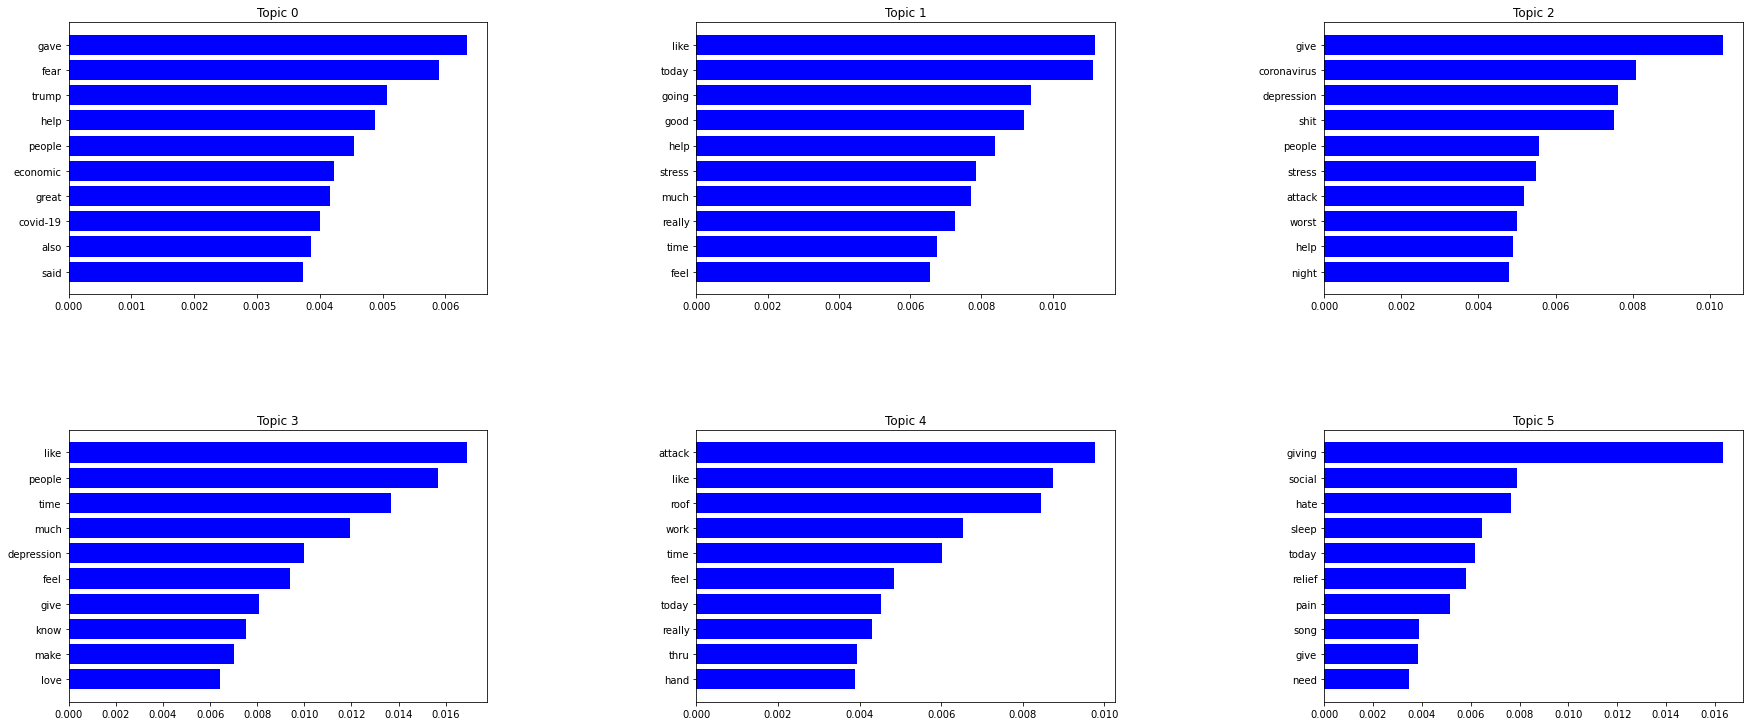

In [65]:
def plot_top_words(lda=tweets_lda, nb_topics=k, nb_words=10):
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(math.sqrt(k))+1,round(math.sqrt(k))+1)
    gs.update(wspace=.5, hspace=.5)
    plt.figure(figsize=(30,20))
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("Topic "+str(i))
        
plot_top_words()

In [84]:
df.iloc[9973]


text        [painting, batman, procreate, pocket, color, paint, iphone, finger, mark, stroke, brush, manhattan, york]
user                                                                                                        jmignault
date                                                                                        2019-11-22 22:07:49+00:00
retweet                                                                                                             0
mention                                                                                                    @Procreate
hashtags                   #painting #anxiety #batman #pocket #art #color #paint #iphone #finger #mark #stroke #brush
location                                                                                                          NaN
Name: 9973, dtype: object